# How to .... ?
A FAQ-like section to quickly find answers to common questions.

### ... change the configuration of the package `h5rdmtoolbox`?

In [1]:
import h5rdmtoolbox as h5tbx

# write the default config to file and make it available
h5tbx.config.write_default_config()
print(h5tbx.config.CONFIG)

2023-02-24_20:49:29,420 DEBUG    [__init__.py:33] changed logger level for h5rdmtoolbox from 20 to DEBUG


{'RETURN_XARRAY': True, 'ADVANCED_SHAPE_REPR': True, 'NATURAL_NAMING': True, 'HDF_COMPRESSION': 'gzip', 'HDF_COMPRESSION_OPTS': 5, 'HTML_MAX_STRING_LENGTH': 40, 'XARRAY_UNIT_REPR_IN_PLOTS': '/', 'REQUIRE_UNITS': True, 'UREG_FORMAT': 'C~', 'STANDARD_NAME_TABLE_ATTRIBUTE_NAME': '__standard_name_table__', 'CONVENTION': 'default', 'INIT_LOGGER_LEVEL': 'DEBUG'}


In [2]:
# change one entry and save it to file (optional)
h5tbx.config.CONFIG.INIT_LOGGER_LEVEL = 'DEBUG'
h5tbx.config.write_user_config(h5tbx.config.CONFIG)
print(h5tbx.config.CONFIG)

{'RETURN_XARRAY': True, 'ADVANCED_SHAPE_REPR': True, 'NATURAL_NAMING': True, 'HDF_COMPRESSION': 'gzip', 'HDF_COMPRESSION_OPTS': 5, 'HTML_MAX_STRING_LENGTH': 40, 'XARRAY_UNIT_REPR_IN_PLOTS': '/', 'REQUIRE_UNITS': True, 'UREG_FORMAT': 'C~', 'STANDARD_NAME_TABLE_ATTRIBUTE_NAME': '__standard_name_table__', 'CONVENTION': 'default', 'INIT_LOGGER_LEVEL': 'DEBUG'}


Best is to check if your configuration file is complete by calling `check_config`. The returned configuration is the corrected one:

In [3]:
from h5rdmtoolbox.config import check_config
check_config(remove_wrong=True)

{'RETURN_XARRAY': True, 'ADVANCED_SHAPE_REPR': True, 'NATURAL_NAMING': True, 'HDF_COMPRESSION': 'gzip', 'HDF_COMPRESSION_OPTS': 5, 'HTML_MAX_STRING_LENGTH': 40, 'XARRAY_UNIT_REPR_IN_PLOTS': '/', 'REQUIRE_UNITS': True, 'UREG_FORMAT': 'C~', 'STANDARD_NAME_TABLE_ATTRIBUTE_NAME': '__standard_name_table__', 'CONVENTION': 'default', 'INIT_LOGGER_LEVEL': 'DEBUG'}

from h5rdmtoolbox.config import check_config, read_user_config
check_config(remove_wrong=True)### ... get a `np.array` returned instead of a `xr.DataArray`?

There are two ways: First, use the global config to control the general behaviour by calling `h5tbx.config.return_xarray=False`. Second option is to call `.values[:]` on the dataset:

In [3]:
import h5rdmtoolbox as h5tbx

h5tbx.config.return_xarray = False
with h5tbx.H5File() as h5:
    h5.create_dataset('test', shape=(3, 4), attrs=dict(long_name='a long name'))
    print(type(h5['test'][:]))
    h5tbx.config.return_xarray = True
    print(type(h5['test'][:]))
    h5tbx.config.return_xarray = True
    print(type(h5['test'].values[:]))

<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


## ... avoid having to provide `units` and `long_name` or `standard_name` during dataset creation
This cannot be avoided as we believe these are minimal auxiliary information (meta data) required with every dataset. If unitless, pass `units=' '` and if you are not using any naming standard provide `long_name` which is just a description of your dataset and should be easy to think of.

## ... acces datasests inependent on its upper or lower case?
If you only now the string but not whether it is writen upper lower case or anything inbetween use this line:

In [6]:
with h5tbx.H5File() as h5:
    h5.create_dataset('TEST', data=1)
    print(h5[h5tbx.lower('test')])

<HDF5 dataset "TEST": shape (), type "<i4", convention "default">


## ... slice a dataset based on a condition?
Good practice is to have dimension attached to the datasets. The dimension scales can be used to decide what to slice exactly. The following example first generates a dataset and the slices it depending on the value in the first dimension, in this case the time:

In [4]:
import numpy as np
with h5tbx.H5File() as h5:
    h5.create_dataset('time', data=range(0, 100), make_scale=True)
    h5.create_dataset('x', data=range(0, 100), make_scale=True)
    h5.create_dataset('y', data=range(0, 200), make_scale=True)
    h5.create_dataset('data', np.random.rand(100, 200, 100), attach_scale=('time', 'y', 'x'))
    data = h5.data[:]
    h5.dump()

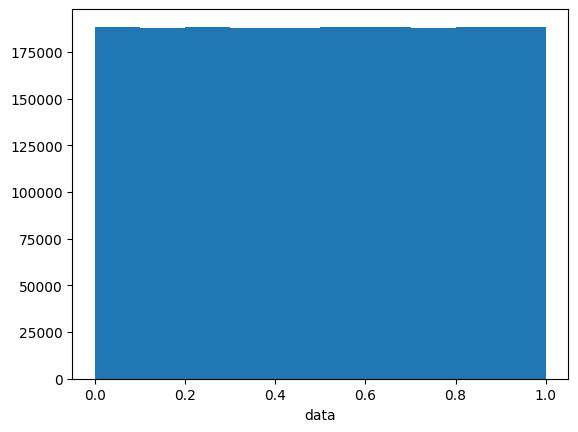

In [6]:
with h5tbx.H5File(h5.hdf_filename) as h5:
    h5.data[h5.data.time > 5.4, :, :].plot()